# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## References

I used the tensorflow model from here: https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583ca88a_cnn/cnn.zip as a starting point. The file was provides in lesson 30 of the Convolutional Neural networks lesson in carND.

For converting images to grayscale I looked into this post: http://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

#training_file = "/home/sysgen/jupyter/train.p"
#testing_file =  "/home/sysgen/jupyter/test.p"

training_file = "J:/traffic-signs-data/train.p"
testing_file = "J:/traffic-signs-data/test.p"


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

### Step 0.1: include label names as array

In [2]:
labels=["Speed limit (20km/h)"
,"Speed limit (30km/h)"
,"Speed limit (50km/h)"
,"Speed limit (60km/h)"
,"Speed limit (70km/h)"
,"Speed limit (80km/h)"
,"End of speed limit (80km/h)"
,"Speed limit (100km/h)"
,"Speed limit (120km/h)"
,"No passing"
,"No passing for vehicles over 3.5 metric tons"
,"Right-of-way at the next intersection"
,"Priority road"
,"Yield"
,"Stop"
,"No vehicles"
,"Vehicles over 3.5 metric tons prohibited"
,"No entry"
,"General caution"
,"Dangerous curve to the left"
,"Dangerous curve to the right"
,"Double curve"
,"Bumpy road"
,"Slippery road"
,"Road narrows on the right"
,"Road work"
,"Traffic signals"
,"Pedestrians"
,"Children crossing"
,"Bicycles crossing"
,"Beware of ice/snow"
,"Wild animals crossing"
,"End of all speed and passing limits"
,"Turn right ahead"
,"Turn left ahead"
,"Ahead only"
,"Go straight or right"
,"Go straight or left"
,"Keep right"
,"Keep left"
,"Roundabout mandatory"
,"End of no passing"
,"End of no passing by vehicles over 3.5 metric tons"]

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
print(X_train.shape)
print(X_test.shape)

(39209, 32, 32, 3)
(12630, 32, 32, 3)


In [4]:
import numpy as np

### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]
# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

### Display random images and the labels
Here I display random images and the corresponding labels. The images have varying sharpness and contrast. But the traffic-signs fill the images nicely.

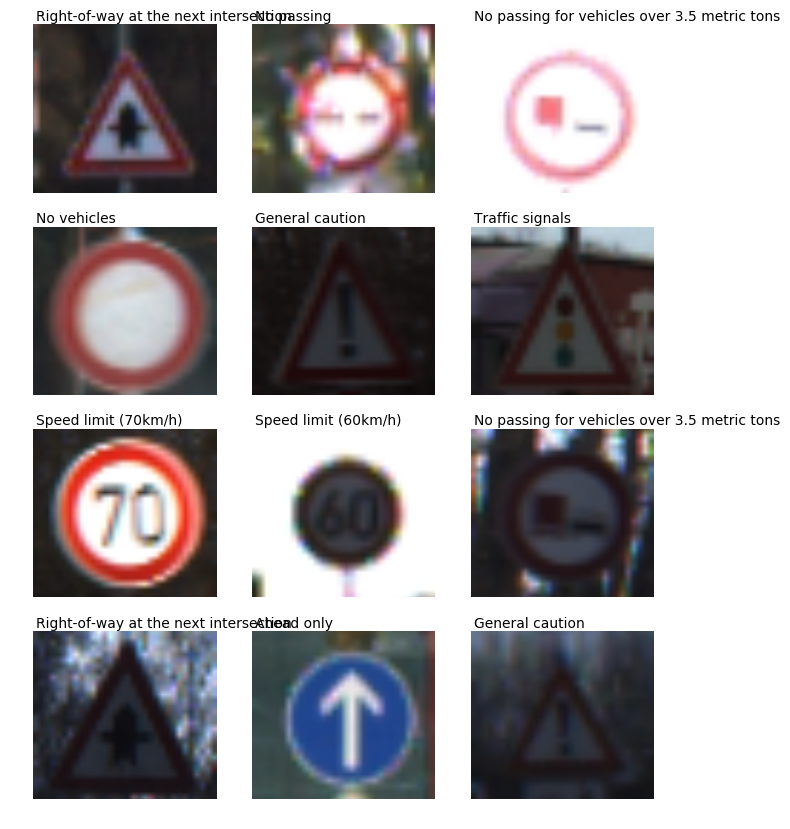

In [6]:
fig, ax = plt.subplots(4,3,sharex=True)
for i in ax:
    for j in i:
        ran=np.random.choice(X_train.shape[0],1)
        j.imshow(X_train[int(ran)])
        j.axis("off")
        j.text(0,0,labels[y_train[int(ran)]])
fig.set_figwidth(8)
fig.set_figheight(10)

## Image statistics
When examining the class count one can see that the dataset is skewed: There are many pictures of class 2 (which is speed-limit 50km/h) and very few images of class 0 (which is speed-limit 20km/h). We can later use the class counts for adjusting the accuracy metrics in TensorFlow

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

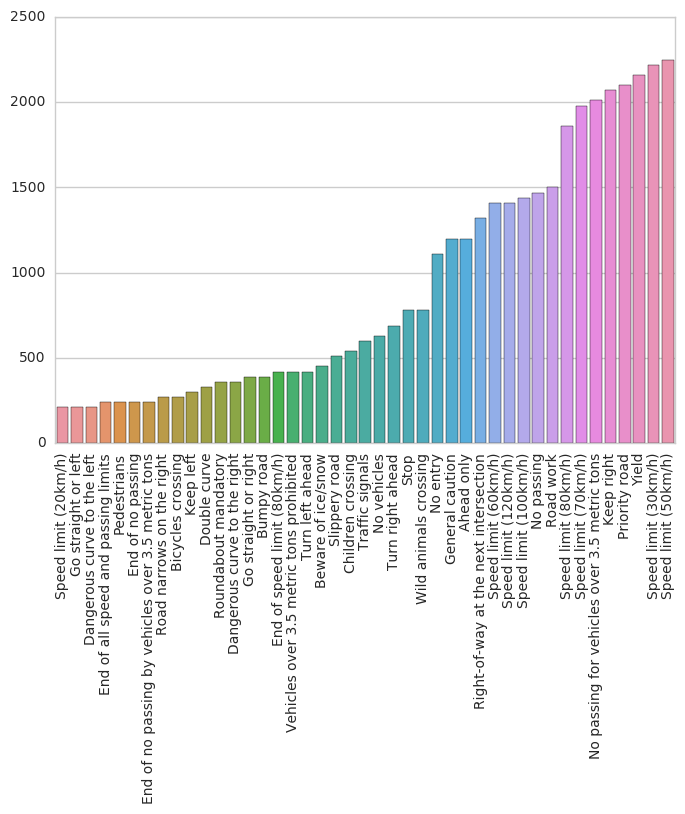

In [7]:
import seaborn as sns
counts = np.array(np.unique(y_train,return_counts=True))
counts=counts[:,np.argsort(counts[1])]
sns.set_style("whitegrid")
ax = sns.barplot(x=[str(labels[i]) for i in counts[0]], y=counts[1])
plt.xticks(rotation=90)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

## Data Preprocessing


### Helper methods
These methods implement the hotencoding and the shuffle of the dataset:

- `hotencoder()` parses two integer: a class ID and an integer specifying the class length. It returns a binary matrix with columns of length `n_classes`
- `shuffle()` shuffles the labels and features in the same way. 

In [8]:
def hotencoder(y,n_classes=43):
    out=np.zeros((len(y),n_classes))
    ex=0
    for i in y:
        out[ex,i]=1
        ex+=1
    return out

def shuffle(x,y):
    new=np.random.choice(x.shape[0],x.shape[0],replace=False)
    return x[new], y[new]

# http://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def rgb2gray(rgb):

    r, g, b = rgb[:,:,:,0], rgb[:,:,:,1], rgb[:,:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray.reshape(rgb.shape[0],rgb.shape[1],rgb.shape[2],1)

### Data Augmentation by random rotation
In this section I rotate all the images by a random angle between -10° and 10° and append them to the original train-set. This will double my train images to a total size of 75417 samples.

**Note: ** Scipy.misc depends on the Pillow package to work properly!

In [9]:
import scipy.misc

xn = [scipy.misc.imrotate(i,np.random.randint(50)-10) for i in X_train]
#xn =  [scipy.ndimage.rotate(i,np.random.randint(20)-10) for i in X_train]

X_train=np.vstack((X_train,xn))
y_train=np.hstack((y_train,y_train))

### Convert to Gray-scale 
I convert to gray-scale by applying the formula provided in the `rgb2gray()` function in the <a href="#Helper-methods" >Helper methods section</a>. I modified the function to be able to not only take a single image but an array of images and convert them in batch.

(-0.5, 31.5, 31.5, -0.5)

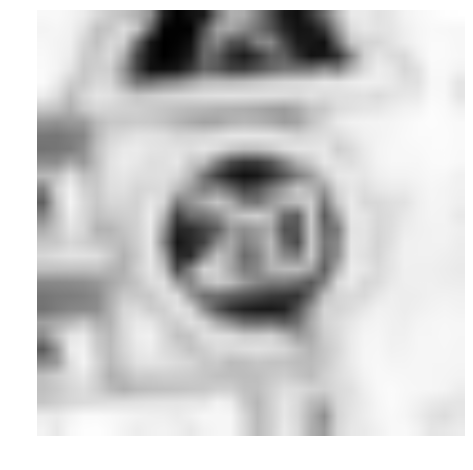

In [10]:
X_train=rgb2gray(X_train)
X_test=rgb2gray(X_test)

# Display an example image
plt.imshow(X_train[0][:,:,0])
plt.axis("off")

### Min-Max scaling
I use Min-Max scaling for precosessing and therefore simply divide the dataset by 255.0

In [11]:
X_train=X_train.astype("float32")
X_train/=255.0

X_test=X_test.astype("float32")
X_test/=255.0

### Shuffle the dataset and create a validation set
First I shuffle the training dataset. Then I extract 3000 samples for validation during training.

In [12]:
X_train,y_train = shuffle(X_train,y_train)

X_val=X_train[0:3000]
y_val=y_train[0:3000]

X_train=X_train[3001:]
y_train=y_train[3001:]

n_train = X_train.shape[0]

## Modell Architecture 

### Parameters and Layer widths

In [13]:
import tensorflow as tf 

batch_size = 100
training_epochs = 1
n_classes = 43  # We have 43 classes
learning_rate = 0.0008  #Learning rate decreased from 0.001

layer_width = {
    'layer_1': 32,
    'layer_2': 32,
    'layer_3': 64,
    'layer_4': 64,
    'layer_5': 128,
    'layer_6': 128,
    'fully_connected': 512
}

### Weights and biases

In [14]:
std=0.1
weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [3, 3, 1, layer_width['layer_1']])),
    'layer_2': tf.Variable(tf.random_normal(
        [3, 3, layer_width['layer_1'], layer_width['layer_2']],stddev=std)),
    'layer_3': tf.Variable(tf.random_normal(
        [3, 3, layer_width['layer_2'], layer_width['layer_3']],stddev=std)),
    'layer_4': tf.Variable(tf.random_normal(
        [3, 3, layer_width['layer_3'], layer_width['layer_4']],stddev=std)),
    'layer_5': tf.Variable(tf.random_normal(
        [3, 3, layer_width['layer_4'], layer_width['layer_5']],stddev=std)),
    'layer_6': tf.Variable(tf.random_normal(
        [3, 3, layer_width['layer_5'], layer_width['layer_6']],stddev=std)),
    'fully_connected': tf.Variable(tf.random_normal(
        [3*3*128, layer_width['fully_connected']],stddev=std)),
    'out': tf.Variable(tf.random_normal(
        [layer_width['fully_connected'], n_classes],stddev=std))
}
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    'layer_4': tf.Variable(tf.zeros(layer_width['layer_4'])),
    'layer_5': tf.Variable(tf.zeros(layer_width['layer_5'])),
    'layer_6': tf.Variable(tf.zeros(layer_width['layer_6'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

### Model function

In [15]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

# Create the model: 3 Blocks with conv layers, max pooling, fully-connected layers and dropout (currently I am not using dropout)
def conv_net(x, weights, biases, dropout):
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2)
    
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv4 = conv2d(conv3, weights['layer_4'], biases['layer_4'])
    
    conv5 = conv2d(conv4, weights['layer_5'], biases['layer_5'])
    conv6 = conv2d(conv5, weights['layer_6'], biases['layer_6'])
    conv6 = maxpool2d(conv6)

    fc1 = tf.reshape(
        conv6,
        [-1, weights['fully_connected'].get_shape().as_list()[0]])
    fc1 = tf.add(
        tf.matmul(fc1, weights['fully_connected']),
        biases['fully_connected'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1,dropout)
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out']) 
    return out


### Optimizer, accuracy and cost function

In [16]:
x = tf.placeholder("float32", [None, 32, 32, 1])
y = tf.placeholder("float32", [None, n_classes])
keep_prob = tf.placeholder(tf.float32)
logits = conv_net(x, weights, biases, keep_prob)

#l2_loss=10000*(tf.nn.l2_loss(weights["layer_1"]) +tf.nn.l2_loss(weights["layer_2"]) + \
#tf.nn.l2_loss(weights["layer_3"]) +tf.nn.l2_loss(weights["layer_4"]) + \
#tf.nn.l2_loss(weights["layer_5"]) +tf.nn.l2_loss(weights["layer_6"]) ) + \
#tf.nn.l2_loss(weights["fully_connected"]) +tf.nn.l2_loss(weights["out"])  

vars   = tf.trainable_variables() 
l2_loss = tf.add_n([tf.nn.l2_loss(v) for v in vars])*0.01 #this is a handy way of simplyfing l2_loss ==> found it on stackoverflow :)

cost = tf.add(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)),l2_loss)


optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))




### Training and export of model

In [17]:
training_epochs = 20


# Initializing the variables
init = tf.global_variables_initializer()

import os 
saver = tf.train.Saver()

print("Training on " +str(X_train.shape[0]) + " samples")

drop_out=1.0
with tf.Session() as sess:
    sess.run(init)
    #print(np.mean((sess.run(weights['fully_connected']))))
    print(sess.run(l2_loss))
    for epoch in range(training_epochs):

        total_batch =  n_train
        l=0
        for i in range(int(np.ceil(n_train/batch_size))): #Loop over the total training examples and pick a batch
            l+=1
            batch_x = X_train[batch_size*i:batch_size*(i+1)]
            batch_y = hotencoder(y_train[batch_size*i:batch_size*(i+1)])           
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,keep_prob:0.05})
        c=sess.run(cost, feed_dict={x: batch_x, y: batch_y,keep_prob:1.0})
        acc=sess.run(accuracy, feed_dict={x: X_val, y: hotencoder(y_val),keep_prob:1.0})
        acc2=sess.run(accuracy, feed_dict={x: X_train[0:1000], y: hotencoder(y_train[0:1000]),keep_prob:1.0})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c) + " val-acc:" + str(acc) +" train-acc:" + str(acc2)  )
    print("Optimization Finished!")
    cur_dir = os.getcwd()
    save_path = saver.save(sess, cur_dir+"/model/model.ckpt")
    print("Modell saved")
    print("Accuracy:", accuracy.eval({x: X_test, y: hotencoder(y_test),keep_prob:1.0}))
    

Training on 75417 samples
45.9587
Epoch: 0001 cost= 37.713226318 val-acc:0.109 train-acc:0.096
Epoch: 0002 cost= 30.409780502 val-acc:0.169667 train-acc:0.151
Epoch: 0003 cost= 25.498748779 val-acc:0.359 train-acc:0.366
Epoch: 0004 cost= 21.768028259 val-acc:0.469333 train-acc:0.464
Epoch: 0005 cost= 18.852489471 val-acc:0.591667 train-acc:0.576
Epoch: 0006 cost= 16.589447021 val-acc:0.687333 train-acc:0.65
Epoch: 0007 cost= 14.667944908 val-acc:0.77 train-acc:0.737
Epoch: 0008 cost= 13.071372032 val-acc:0.823 train-acc:0.799
Epoch: 0009 cost= 11.762669563 val-acc:0.860333 train-acc:0.841
Epoch: 0010 cost= 10.617207527 val-acc:0.884333 train-acc:0.871
Epoch: 0011 cost= 9.637834549 val-acc:0.900333 train-acc:0.884
Epoch: 0012 cost= 8.773625374 val-acc:0.916 train-acc:0.908
Epoch: 0013 cost= 8.030092239 val-acc:0.928667 train-acc:0.923
Epoch: 0014 cost= 7.391857147 val-acc:0.939333 train-acc:0.937
Epoch: 0015 cost= 6.791119099 val-acc:0.952333 train-acc:0.947
Epoch: 0016 cost= 6.26906251

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

- I used min-max scaling and divided the images by 255.0. This was done to ensure that the optimizer can make the model converge better. Another possible option would have been to substract the mean and divide by the standard deviation. I did not evaluate this method.
- I randomly rotated images by an angle between +30° while always substracting -10°. I had to do this because without the generation of this additional data I had to cope with massive overfitting on the training set.
- I converted them to grayscale. I used a commonly used function which I adapted to convert batches of images. See <a href="#Helper-methods">Section Helper methods</a> for more.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

This is my pipeline for preprocessing:
    
- I used the provides test-set for testing the model accuracy after training. **I did not look** into this set beforehand. 
- I randomly shuffled the training-set. This was done because all the images where sorted by the class ID.
- I then extracted 3.000 samples of the training-set for a validation-set. I used this set to evaluate the modell acuracy while training.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Jump to  <a href="#Modell-Architecture">Model Architecture</a> to take a closer look at my model. I picked a ConvNet as an architecure as it is best suited for dealing with pictures. I adapted the model which was provied in the "Convolitional Neural Networks lesson" in the carND course.<a href="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583ca88a_cnn/cnn.zip">(Zip-File)</a>.

My model consists of the following structure:

`conv_net:`
    
    #block 1
    1_conv_layer (32 kernels)
    2_conv_layer (32 kernels)
    max_pooling
    
    #block 2
    3_conv_layer (64 kernels)
    4_conv_layer (64 kernels)
    
    #block 3
    5_conv_layer (128 kernels)
    6_conv_layer (128 kernels)
    max_pooling

    #block 4
    flatten
    fully_connected (512)
    out (43)
    
I used the following settings:

- Kernel size of 3x3x1 for conv layers
- Strides of one for conv layers
- Strides [1,2,2,1] for max-pooling and padding set to `VALID`

Important note: I did not use the implemented dropout and sticked to max-pooling and data augmentation for better generalization.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the Adam optimizer. I played alot with learning rate but found that setting the learning rate to 0.001 gives best results.

Other important parameters are:
- batch_size = 100
- training_epochs = 20

I set the batch size to 300 to compensate for memory issues and choose 20 training epochs. The number of training epochs was choosen while evaluating the convergence of the model. 

For the cost function I used the cross entropy function (based on logits). I extended the function to include `l2_loss` which is basically summing up the magnitude of the parameters and mulitplying it by a factor.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I first started with a simple fully connected network which was not suitable to this problem at all. I then
build a very small convnet (only one conv layer + one hidden layer). This resulted in massive underfitting of the dataset. I then decide to do the following:

- Increase number of convolutional kernels.
- Increase number of layers in the network.

After adding an additional layer I started training again and also tested different learning rates. My current architecture proofed to be able to catch the features of the training data set pretty good. Of course this yielded two problems: 

- Training size increased
- Overfitting increased

To reduce overfitting I used data augmentation and randomly rotated the images. I also included `l2_loss`. To compensate for the increased training time I converted the pictures to grayscale. This showed to offer only very slight disadvanted on accuracy while decreasing the overall. parameter count.

One thing I had issues with were saturation and clipping on the softmax propabilties. Basically, the softmax did only show 0 or 1 values. This was due to high values of the activation function. I could compensate for this by changing the way the parameters are initialized and decreasing the standard deviation from 1.0 to 0.1.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Predict function
This function loads the stored TensorFlow model and makes a prediction. It return the logits

In [18]:
import os 

cur_dir = os.getcwd()

def predict(INPUT):
    with tf.Session() as sess:
        saver.restore(sess, cur_dir+ "/model/model.ckpt")
        inp = tf.placeholder(tf.float32)
        sm=tf.nn.softmax(inp)
        out=sess.run(logits, feed_dict={x: INPUT, keep_prob:1.0})
        test=sess.run(tf.nn.softmax(out))
        #print(test)
    return out

#softmax convertion: We'll use this later
def softmax(x):
    b=np.sum(np.exp(x))
    return np.exp(x)/b

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I picked five german traffic signs from Google and cropped them to make the traffic sign fit the image. I implemented a function `implement` which can be found in the section <a href="#Predict-function">Predict function</a>. To make this work one has to first apply the same preprocessing I used on the training data: 

- Reshape the pictures to 32x32 
- Transform to grayscale
- Divide by 255.0 to apply Min-Max scaling

We can then feed the pictures in the function. The results are plotted below:

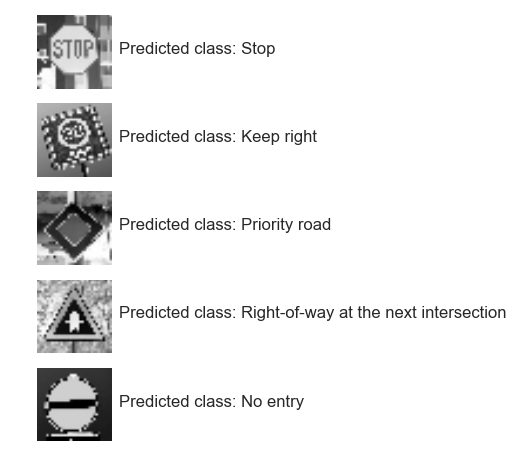

In [19]:
from PIL import Image
saver = tf.train.Saver()

for i in range(5):
    plt.subplot(5,1,i+1)
    im=Image.open(str(i+1)+".jpg").resize((32,32),Image.NEAREST)
    im=np.array(im)
    im=rgb2gray(im.reshape(1,32,32,3))
    im/=255.0
    plt.imshow(im[0,:,:,0])
    plt.axis("off")
    im.astype("float32")
    p=predict(im)
    pred=labels[np.argmax(p)]
    plt.text(35,16, "Predicted class: "+ pred)
    

It seems to be dificult for the model to predict the correct class when the picture was taken from a very steep angle (like the second picture). Also very crucial is preprocessing: Not using interpolation while resizing the images also seems to disturb the model.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

### Model accuracy 

My model got 4 out of 5 pictures right. The wrong predicted class is the second pictures ("predicted: *Slippery road*"). The correct class should have been *speed limit 30km/h*. 
The accuracy of my model on real world pictures is therefore:

$$ accuracy = \frac{4}{5} = 80\% $$

### Interpretation of model accuracy

The model accuracy of 80% is worse than the accuracy on the validation and test-set which were greater than 90% in both cases. Before interpreting the results there is one **import issue** to think about: we only tested the accuracy on 5 pictures. The small number of pictures can not give a representative view of the overall model accuracy.

There are multiple factors which can influence the model performance: 

- Contrast of images 
- Stretching 
- Rotation of images
- Noise / distortion
- in-class variance (does not apply here)

The reason the model got this specific picture wrong is due to the fact, that the speed limit signs are hard to distinguish: The traffic signs have the same shape and distinguishing 30km/h and 50km/h signs is especially dificult: The only difference here is the number **3** and **5**. And these two numbers are also very similar! As all images are also scaled down to 32x32 pixels these numbers can get really blurry. 

We can try to underpin this theory by simply cropping the wrong classified image and then classify it again:

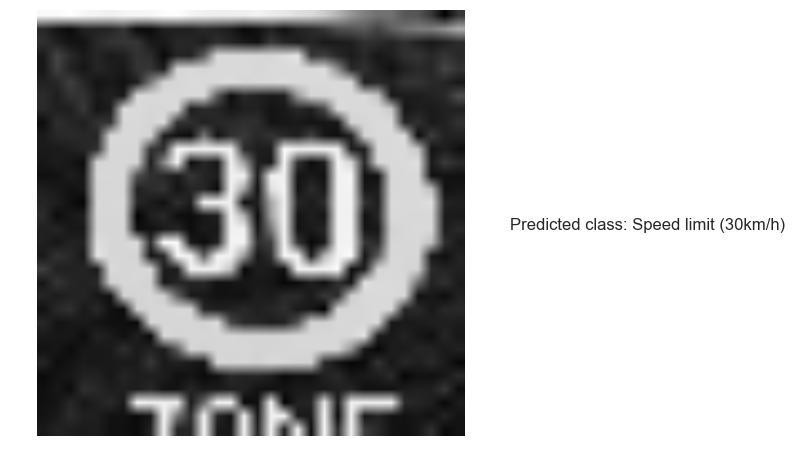

In [22]:
from PIL import Image
saver = tf.train.Saver()

im=Image.open("2_new.jpg").resize((32,32),Image.NEAREST)
im=np.array(im)
im=rgb2gray(im.reshape(1,32,32,3))
im/=255.0
plt.imshow(im[0,:,:,0])
plt.axis("off")
im.astype("float32")
p=predict(im)
pred=labels[np.argmax(p)]
plt.text(35,16, "Predicted class: "+ pred)
    

** As one can see now, the model gets the traffic sign right!** So in a real world scenario there are multiple things to keep in mind:

- The model will only work well on cropped images as all images in the test set are also cropped.
- Speed limits seem to be especially hard to distinguish and the model will have problems making good predictions here, when there are unfavorable circumstances.



### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

Here are my plotted **softmax propabilities**. I used the top 5 propabilites. One can see that the network is very confident on all predictions. the second row shows "slippery road" which was not correct. The correct class *30km/h* is also not in the top 5. 

For the implementation I used a own small function `softmax()` which commutes it from the raw logits. 

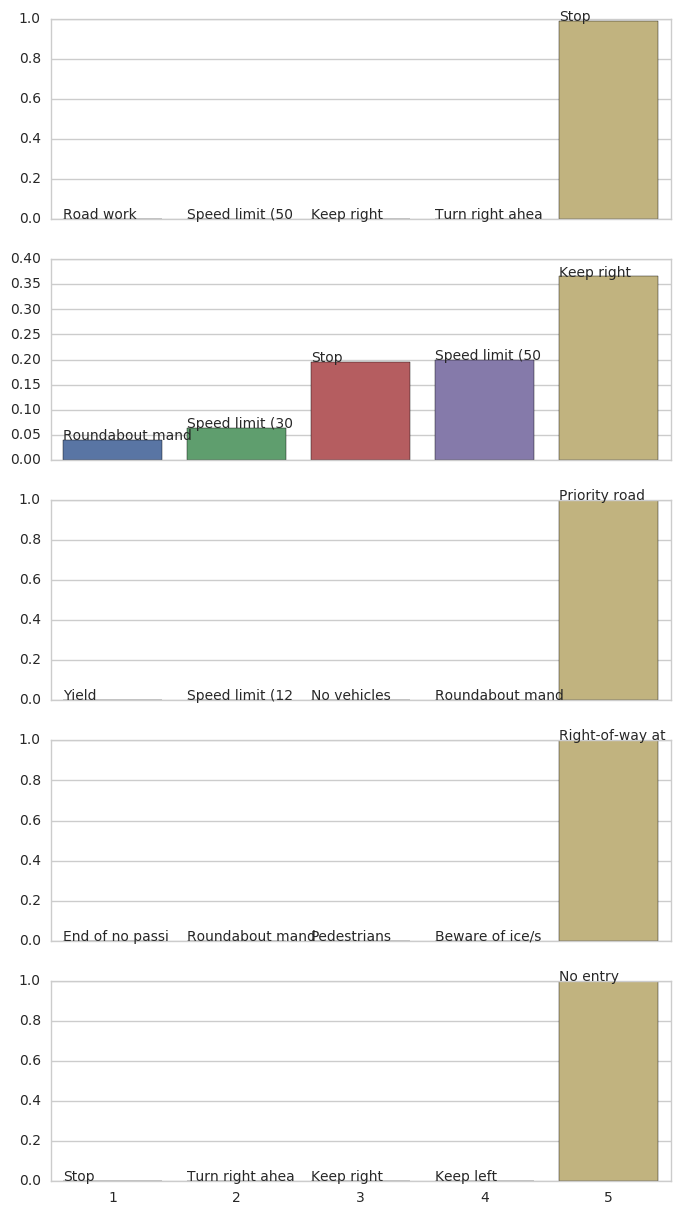

In [23]:
raws = []
total=1
#http://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
index=1
fig, ax = plt.subplots(5,1,sharex=True)
for i in ax:
    im=Image.open(str(index)+".jpg").resize((32,32),Image.NEAREST)
    im=np.array(im)
    im=rgb2gray(im.reshape(1,32,32,3))
    im/=255.0
    im.astype("float32")
    p=predict(im)
    raws.append(softmax(p))
    l = [labels[i] for i in np.argsort(p)[0][-5:]]
    sns.barplot([1,2,3,4,5],y=softmax(p)[0][np.argsort(p)[0][-5:]],ax=i)  
    c=0
    for p in i.patches: 
        height = p.get_height()
        i.text(p.get_x(), height+ 0, l[c][0:15],fontsize=10)
        c+=1
    index+=1
fig.set_figheight(15)

### Here are the sotmax values for the 5 images  

In [24]:
print(raws)

[array([[  4.42857621e-04,   2.46439682e-04,   8.44124414e-04,
          3.40851140e-04,   2.38209963e-04,   7.37933078e-05,
          6.91648529e-05,   1.09565435e-05,   1.64084864e-04,
          7.59564500e-06,   2.57680258e-05,   8.33545855e-05,
          2.06260302e-04,   2.91896577e-04,   9.89487767e-01,
          1.45406608e-04,   7.01509998e-06,   1.56347436e-04,
          4.27009596e-04,   3.22651285e-05,   6.57072451e-05,
          1.23683014e-04,   2.92193523e-04,   1.16466044e-05,
          7.41342883e-05,   7.06978317e-04,   4.59092000e-04,
          4.66290367e-05,   1.82220228e-05,   5.18799789e-05,
          4.84384254e-05,   1.59405725e-04,   3.87434084e-05,
          1.27108546e-03,   5.70259930e-04,   5.05162927e-04,
          9.97133902e-05,   5.28092671e-04,   1.22212048e-03,
          1.90243794e-04,   1.72251937e-04,   1.65864803e-05,
          2.65014223e-05]], dtype=float32), array([[  1.00008221e-02,   6.36791363e-02,   1.99155882e-01,
          5.25693700e-04,